In [1]:
import logging, sys
from typing import List, Callable, Optional, Any

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from IPython.display import display, Latex
from mpl_toolkits.mplot3d import Axes3D

from pynamics import downsample, downsample_split, avg_over
from pynamics.utils import np_cache, eigsort
from pynamics.systems import Lorenz

rc('text', usetex=True)
#logging.basicConfig(level=logging.INFO)
np.set_printoptions(threshold=100)

# Applying the transfer operator approach

### 1. Coarse-graining in space:

#### Clustering

We run an explicit coarse-graining step by clustering the embedding space.

### 2. Coarse-graining in time: 

#### Downsampling
We are interested in the long-term behavior of the system (and have finitely powerful computers), so we downsample the trajectory, discarding many intermediate timesteps.

#### Delay embedding
To achieve a near-memory-less (Markovian) definition of state, we stack delayed copies of measurements within a short time window.

# Parameters

In [2]:
# ------------------------
# DOUBLE WELL PARAMETERS
# ------------------------

# Main parameters:
SIGMA=10.
RHO=28
BETA=8. / 3

# The following parameters influence temporal resolution and trajectory duration
TIMESTEP = 0.01 # 0.01 
DOWNSAMPLE_RATE = 10 # 10

TIMESPAN = 1000 # 100000
N_STEPS = int(TIMESPAN // TIMESTEP)
N_BURN_IN = 1000 

N_CLUSTERS = 500
TRANSITION_TIMESCALE = 1 # This is the number of timesteps to take before counting a transition from one cell to the next
# -----------------------
# PLOTTING PARAMETERS
# ------------------------

EIGENVALUE_RANGE = [1, 10]

In [3]:
RATE = 1
TIMESTEP = 0.01
RHOS = [ 0.1, 1, 2, 5, 10, 12, 18, 24, 28]
TIMESTEP = 0.01


# Generating data

RHO = 0.1


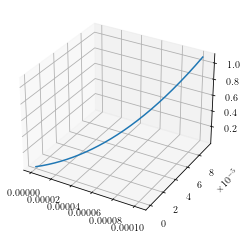

Burning-in Osedelets matrix: 1000it [00:00, 100785.85it/s]
QR-Decomposition of trajectory: 98999it [00:00, 129228.52it/s]


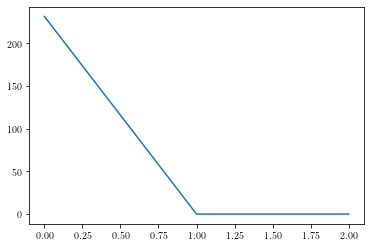

RHO = 1


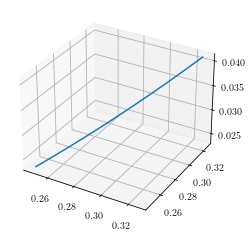

Burning-in Osedelets matrix: 1000it [00:00, 99969.11it/s]
QR-Decomposition of trajectory: 98999it [00:00, 110312.41it/s]


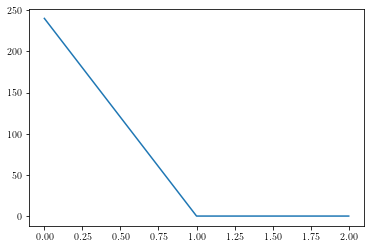

RHO = 2


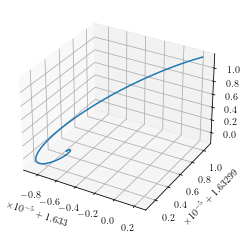

Burning-in Osedelets matrix: 1000it [00:00, 104481.47it/s]
QR-Decomposition of trajectory: 98999it [00:00, 120874.98it/s]


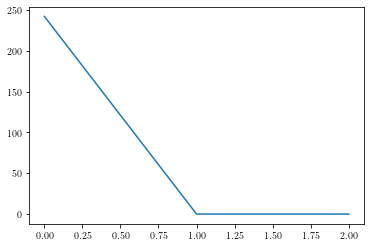

RHO = 5


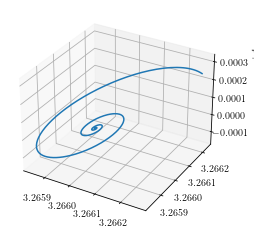

Burning-in Osedelets matrix: 1000it [00:00, 101887.58it/s]
QR-Decomposition of trajectory: 98999it [00:00, 113537.73it/s]


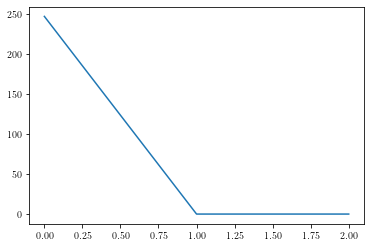

Generating samples:   0%|          | 0/99999 [00:00<?, ?it/s]

RHO = 10


Generating samples: 100%|██████████| 99999/99999 [00:17<00:00, 5638.26it/s]


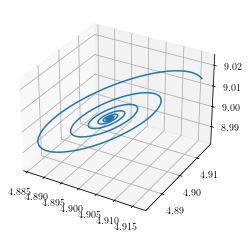

Burning-in Osedelets matrix: 1000it [00:00, 109132.88it/s]
QR-Decomposition of trajectory: 98999it [00:00, 118509.02it/s]


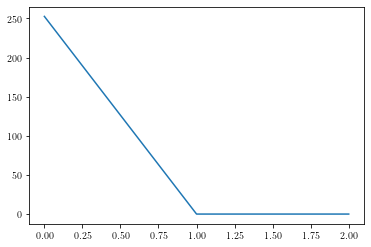

Generating samples:   0%|          | 0/99999 [00:00<?, ?it/s]

RHO = 12


Generating samples:  23%|██▎       | 23270/99999 [00:04<00:13, 5603.68it/s]


KeyboardInterrupt: 

In [11]:

for rho in RHOS:
    print(f"RHO = {rho}")
    lorenz = Lorenz(sigma=SIGMA, rho=rho, beta=BETA, timestep=TIMESTEP)
    time_series = lorenz.run(n_steps=N_STEPS, n_burn_in=N_BURN_IN)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(time_series[:1000,0],time_series[:1000,1],time_series[:1000,2])
    plt.show()

    fig = plt.figure()
    lyapunov_spectrum = lorenz.get_lyapunov_spectrum(time_series, n_burn_in=1000, t_ons=10)
    plt.plot(lyapunov_spectrum)
    plt.show()